# Capstone Design Project: Predicting if a Reddit Meme is Good or Bad Meme

David M. Arnold<br> 
Orion99DA@gmail.com<br>
BrainStation Data Science Candidate<br>
Winter Cohort 2021<br>

**Workbook #1 - Data Cleaning and Exploration<br>**

This project is based on a dataset of collected Reddit memes that is shared on Kaggle.com.  Memes play an important role in social media platforms like Facebook, Twitter, Reddit and 4Chan and are shared by all types of users. I wanted to explore this data to determine if Machine Learning algorithms and Image Classification models could accurate predict what memes were actually popular in the Reddit social media platform, based on the amount of up votes and down votes each of these memes received.

While this project is meant to be a technical study of what factors may or may not contribute to a meme's popularity on Reddit, there are user names, comments and even the memes themselves that people reviewing this project may find vulgar and offensive.  

Please note that this project will be divided into several workbooks that will review and clean the data, transform the data into usable forms, perform the machine learning process on the data and perform image classification on the meme images.

**Workbook Overview**

This notebook will focus on importing the data included in the json database file that was downloaded from Kaggle.  The data will be converted from semi-structured into a usable tabular format.  Cleaning the data for missing or null values, checking the data for duplicate values.  Next the data will be visualized and the different columns of data analyzed to see what data they actually contain.  

Once the data has been familiarized, the process of determining how each column of data can be used in the machine learning process needs to begin.  I need to determine if the columns are in a usable numeric form or if they need to be converted to a numeric form.  Additionally some columns need to be discarded if they add no value to the machine learning process.  

### 1.1 Loading Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

# For converting time series data
import datetime

# Plotting and visualizing libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# For working with json data
import json 
from pandas.io.json import json_normalize

Importing the datafile "db.json" into the workbook.  Json differs from typical data files such as csv files, which are already structured into rows and columns, using a "," to separate the values.  

#### 1.1.1 Read in the JSON Datafile 

In [2]:
# Importing json database file "db", saving it as a dataframe

with open("json/db.json", 'r') as file:
    json_data = json.load(file)
json_data = json_data['_default']

Now that the json data file has been imported, we can view how the data is arranged.

In [3]:
# Viewing the raw json data

json_data

{'1': {'title': 'Num🅱er One',
  'thumbnail': {'thumbnail': 'https://b.thumbs.redditmedia.com/FAS_fWvrpmzuPN6Rh67I9ahmovzoe-titgZNilnewpk.jpg',
   'height': 121,
   'width': 140},
  'created_utc': 1502621109.0,
  'author': 'DrarenThiralas',
  'id': '6tehbc',
  'ups': 87082,
  'downs': 0,
  'media': 'https://i.redd.it/7wgs4dkiihfz.png'},
 '2': {'title': 'Got ‘em',
  'thumbnail': {'thumbnail': 'https://b.thumbs.redditmedia.com/huIqG6r8L3pryts7WKfLCC-bYHCp2v0dMjXMe2efdPw.jpg',
   'height': 98,
   'width': 140},
  'created_utc': 1523557287.0,
  'author': 'CasualDad8675309',
  'id': '8bse8k',
  'ups': 75251,
  'downs': 0,
  'media': 'https://i.redd.it/65bzzioisir01.jpg'},
 '3': {'title': '50-0',
  'thumbnail': {'thumbnail': 'https://b.thumbs.redditmedia.com/1LvJdhkQttbVzoBvGkHaqK-LoQ1yPyKoFr8z-Rc1y2M.jpg',
   'height': 140,
   'width': 140},
  'created_utc': 1503862227.0,
  'author': 'NikiTosThePleb',
  'id': '6we7gp',
  'ups': 64236,
  'downs': 0,
  'media': 'https://i.redd.it/19c4ggoz0ciz.

While the information is readable, working with the data in this form would be challenging.  Working with the data in a tabular format is preferable, so we will transform the data into tabular form.

In [4]:
# Setting up an empty dataframe 
json_data2 = DataFrame([])

# Looping over the data to pass the data into columnar/tabular form
df_json = DataFrame([])
for i in json_data:
    json_data2 = pd.json_normalize(json_data[i])
    df_json = df_json.append(json_data2)

# Index column, adds a number for each row of data
df_json.index=range(len(json_data))

Now let's look at the data in the updated tabular form:

In [5]:
# Checking the top five rows and all the columns of the dataframe

df_json.head(5)

,title,created_utc,author,id,ups,downs,media,thumbnail.thumbnail,thumbnail.height,thumbnail.width
0,Num🅱er One,1.502621e+09,DrarenThiralas,6tehbc,87082,0,https://i.redd.it/7wgs4dkiihfz.png,https://b.thumbs.redditmedia.com/FAS_fWvrpmzuP...,121,140
1,Got ‘em,1.523557e+09,CasualDad8675309,8bse8k,75251,0,https://i.redd.it/65bzzioisir01.jpg,https://b.thumbs.redditmedia.com/huIqG6r8L3pry...,98,140
2,50-0,1.503862e+09,NikiTosThePleb,6we7gp,64236,0,https://i.redd.it/19c4ggoz0ciz.png,https://b.thumbs.redditmedia.com/1LvJdhkQttbVz...,140,140
3,Allow,1.515929e+09,bananahands0666,7qbcqw,63386,0,https://i.redd.it/qt5p8ozio0a01.png,https://a.thumbs.redditmedia.com/OoC51rX7qUafr...,110,140
4,*mild concern*,1.516919e+09,DJ_MilkBags,7szw80,61458,0,https://i.redd.it/1cudu2jlgac01.jpg,https://b.thumbs.redditmedia.com/f1HuHxndsoLGb...,134,140


In [6]:
# Checking the bottom five rows and all the columns of the dataframe

df_json.tail(5)

,title,created_utc,author,id,ups,downs,media,thumbnail.thumbnail,thumbnail.height,thumbnail.width
3221,CNN Amirite,1.499341e+09,zqsec123,6ll67v,499,0,https://i.redd.it/c2kkan9uky7z.png,https://b.thumbs.redditmedia.com/mRnabeuP0Qsog...,140,140
3222,This is beutiful,1.517679e+09,Asado666,7v0mj7,496,0,https://i.redd.it/z45uldtv71e01.jpg,https://b.thumbs.redditmedia.com/bFAZzXBRdhjZA...,140,140
3223,Checkmate Athiests,1.514206e+09,XANTH13,7m16wo,497,0,https://i.redd.it/4tsdj4ied2601.jpg,https://b.thumbs.redditmedia.com/t9a485TL8iWOg...,128,140
3224,yOUrE ThE WrONg ColOR,1.510689e+09,Liltimmytims,7cy93b,494,0,https://i.redd.it/sq1916z1xzxz.jpg,https://b.thumbs.redditmedia.com/1H7AhPhSXT_NH...,87,140
3225,Black Monopoly,1.496850e+09,HarryR99,6fu7xz,502,0,https://i.redd.it/l0cfdwmyt82z.jpg,https://b.thumbs.redditmedia.com/zBrWKXSL8L3Xd...,140,140


In [7]:
print(f'The shape of the df_json Dataframe is {df_json.shape[0]} rows by {df_json.shape[1]} columns.')

The shape of the df_json Dataframe is 3226 rows by 10 columns.


The type of datatype for each column:

In [8]:
# View the columns and their data types for each column

df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3226 entries, 0 to 3225
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                3226 non-null   object 
 1   created_utc          3226 non-null   float64
 2   author               3226 non-null   object 
 3   id                   3226 non-null   object 
 4   ups                  3226 non-null   int64  
 5   downs                3226 non-null   int64  
 6   media                3226 non-null   object 
 7   thumbnail.thumbnail  3226 non-null   object 
 8   thumbnail.height     3226 non-null   int64  
 9   thumbnail.width      3226 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 252.2+ KB


**Renaming Columns**

I will neaten up a few of the data columns by renaming them.

In [9]:
# Renaming the columns 

df_json.columns = [
    'title', 'date_posted', 'author', 'id_number', 'up_votes', 'down_votes',
    'media_link', 'image_thumbnail', 'height_thumbnail', 'width_thumbnail'
]

df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3226 entries, 0 to 3225
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             3226 non-null   object 
 1   date_posted       3226 non-null   float64
 2   author            3226 non-null   object 
 3   id_number         3226 non-null   object 
 4   up_votes          3226 non-null   int64  
 5   down_votes        3226 non-null   int64  
 6   media_link        3226 non-null   object 
 7   image_thumbnail   3226 non-null   object 
 8   height_thumbnail  3226 non-null   int64  
 9   width_thumbnail   3226 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 252.2+ KB


There are total of 10 columns of data and 3 different datatypes.

**Datatypes:**
- There is 1 `float64` column.
- There are 4 `int64` columns.
- There are 5 `oject` columns

There are currently two target columns for the dataset, which are the columns of interest that we would like to gain a deeper insight into what determines if a meme goes viral.  The two columns are the up votes and down votes.

The features are the rest of the data columns that are the independent variables about which the target variables are compared.  They are used to determine if there are relationships among the other independent variables which effect the popularity of the meme and give insight into the number of up votes and down votes.

**Targets:**<br>
`up_votes`: The amount of postive votes the meme received.<br> 
`down_votes`: The amount of negative votes the meme received.<br> 

**Features:**  
`title`: The of the meme.<br>
`date_posted`: The date that the meme was posted.<br>
`author`: The author or Reddit username that created the post.<br>
`id_number`: The unique identifier, a 6 letter/number combination for each post.<br>
`media_link`: The link to the post on Reddit.<br>
`image_thumbnail`: This links directly to the thumbnail image of the post.<br>
`height_thumbnail`: The thumbnail height in pixels.<br>
`width_thumbnail`: The thumbnail width in pixels.<br>


### 1.2 Cleaning the Dataset

Now that the data has been loaded, the columns renamed into an appropriate format.  The data needs to be reviewed and cleaned, inspected for duplicate values and possible "nulls" or missing values.

This is from a cleaned dataset from Kaggle, but performing a check for duplicate values and null values is still a good practice to ensure the integrity of the dataset.

#### 1.2.1 Check for duplicate values

Checking for duplicate rows.

In [10]:
# Check the sum of duplicates in the rows

df_json.duplicated().sum()

0

In [11]:
df_json.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3221    False
3222    False
3223    False
3224    False
3225    False
Length: 3226, dtype: bool

Check for duplicate columns.

In [12]:
df_json.T.duplicated().sum()

0

In [13]:
df_json.T.duplicated()

title               False
date_posted         False
author              False
id_number           False
up_votes            False
down_votes          False
media_link          False
image_thumbnail     False
height_thumbnail    False
width_thumbnail     False
dtype: bool

There are no duplicated rows or columns in the data.

#### 1.2.2 Checking for Nulls Values/NaNs

In [14]:
# Checking for Nulls

df_json.isnull().sum()

title               0
date_posted         0
author              0
id_number           0
up_votes            0
down_votes          0
media_link          0
image_thumbnail     0
height_thumbnail    0
width_thumbnail     0
dtype: int64

In [15]:
print(f'The dataset null value count: {df_json.isnull().any().sum()}')

The dataset null value count: 0


There are no null values in the dataset.

#### 1.2.3 Check the Object Data for Unique Values

Check the object columns for unique values.

In [16]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3226 entries, 0 to 3225
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             3226 non-null   object 
 1   date_posted       3226 non-null   float64
 2   author            3226 non-null   object 
 3   id_number         3226 non-null   object 
 4   up_votes          3226 non-null   int64  
 5   down_votes        3226 non-null   int64  
 6   media_link        3226 non-null   object 
 7   image_thumbnail   3226 non-null   object 
 8   height_thumbnail  3226 non-null   int64  
 9   width_thumbnail   3226 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 252.2+ KB


In [17]:
# Checking for unique values

print(
    f'The meme title column has {df_json["title"].nunique()} unique values.'
)
print(
    f'The author column has {df_json["author"].nunique()} unique values.'
)
print(
    f'The meme id_number column has {df_json["id_number"].nunique()} unique values.'
)
print(
    f'The media link column has {df_json["media_link"].nunique()} unique values.'
)
print(
    f'The image thumbnail column has {df_json["image_thumbnail"].nunique()} unique values.'
)

The meme title column has 3110 unique values.
The author column has 2197 unique values.
The meme id_number column has 3226 unique values.
The media link column has 3223 unique values.
The image thumbnail column has 3179 unique values.


It appears that there are several columns that may have duplicate names, descriptions or links.  I will review the value counts of each column to determine what may be responsible for this.

In [18]:
# Checking the value counts

print(
    f'The meme title column {df_json["title"].value_counts()} value counts.'
)
print(
    f'The author column {df_json["author"].value_counts()} value counts.'
)
print(
    f'The meme id_number column {df_json["id_number"].value_counts()} value counts.'
)
print(
    f'The media link column {df_json["media_link"].value_counts()} value counts.'
)
print(
    f'The image thumbnail column {df_json["image_thumbnail"].value_counts()} value counts.'
)

The meme title column .                                           20
True                                         7
Meirl                                        5
Oof                                          5
Savage                                       4
                                            ..
When you democratically remove democracy     1
I cri evritiem                               1
So true.                                     1
Me when I'm finished...                      1
Communism                                    1
Name: title, Length: 3110, dtype: int64 value counts.
The author column Holofan4life         90
BraveReddit          74
Asado666             73
None                 46
frenzy3              27
                     ..
lordumoh              1
ThePickleKing1111     1
KarmaInFlow           1
jgullo04              1
GBR974                1
Name: author, Length: 2197, dtype: int64 value counts.
The meme id_number column 66o9x9    1
7v0chz    1
625203    1
7vxydo  

It appears that several memes posted have the same title/description provided by the poster.  This is possible that the title or the description may be the same but the meme itself may be unrelated.  

There are several instances of the same Reddit user posting more than one meme post, this is actually an important part of the project for analysis to determine if users that post more receive higher post likes.

There are actually several duplicate links to posts and thumbnail images.  These instances are very few and since this test case if taken over a span of several years, it is possible that someone reposted an older meme again, this should be interesting to see if the same meme received most or less up votes compared to the first time it was posted.

There are several instances in the thumbnail image column that instead of displaying the link to the thumbnail, they actually have a "NSFW" (not safe for work) warning.  This may be set by the Reddit moderators or the user themselves.

Overall, I am not concerned by the repeat values found here for title, author or the media links.  These are only a few instances of repetition and actually will be part of the study, especially the authors that have several posts.

#### 1.2.4 Visualize the Numerical Data

In [19]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3226 entries, 0 to 3225
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             3226 non-null   object 
 1   date_posted       3226 non-null   float64
 2   author            3226 non-null   object 
 3   id_number         3226 non-null   object 
 4   up_votes          3226 non-null   int64  
 5   down_votes        3226 non-null   int64  
 6   media_link        3226 non-null   object 
 7   image_thumbnail   3226 non-null   object 
 8   height_thumbnail  3226 non-null   int64  
 9   width_thumbnail   3226 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 252.2+ KB


In [20]:
# Set a dataframe for the numeric data

df_json_num = df_json.drop(["title", "date_posted", "author", "id_number", "media_link", "image_thumbnail"], axis=1)

print(f'The shape of the numeric dataframe is {df_json_num.shape[0]} rows and {df_json_num.shape[1]} columns.')

The shape of the numeric dataframe is 3226 rows and 4 columns.


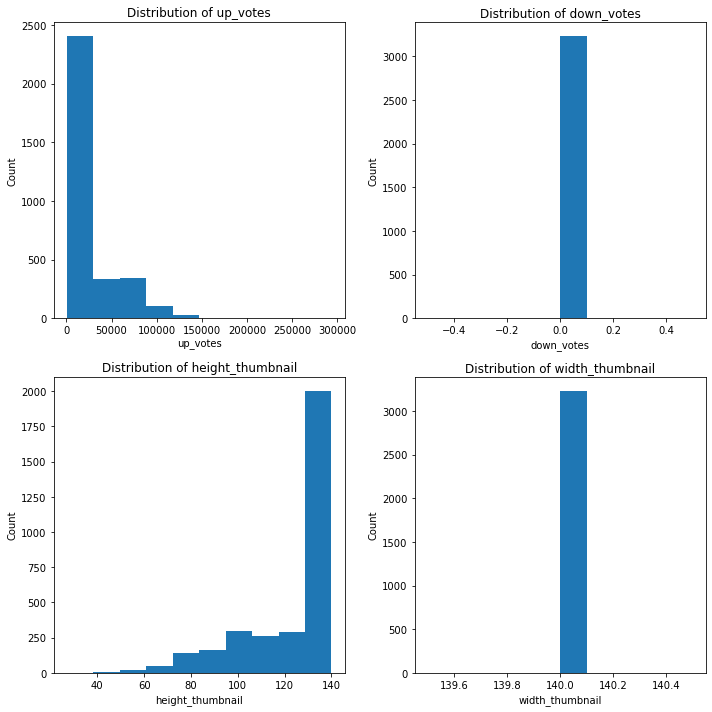

In [21]:
# Setting up numeric subplots
plt.subplots(2, 2, figsize=(10,10))

# Iterate over the enumerated feature names
for num, column in enumerate(df_json_num, start=1):
    
    # Make a histogram for each feature
    plt.subplot(2, 2, num) # number of rows in the grid, number of columns in the grid, slot number
#    sns.distplot(df[feature], kde=False)
    plt.hist(df_json_num[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    
# This ensures the subplots do not overlap
plt.tight_layout()

# Show the subplots
plt.show()


In [22]:
#Up votes statistical table

print(df_json['up_votes'].describe())

count      3226.000000
mean      23802.590205
std       29055.319383
min         494.000000
25%        2842.750000
50%       14757.000000
75%       30334.500000
max      293544.000000
Name: up_votes, dtype: float64


The 'up_votes' column has a mean of ~24,000 up votes per post, and the minimum up votes being 494 and the maximum being 293544 votes.  The overall data does not appear to be normally distributed.

In [23]:
#Down votes statistical table

print(df_json['down_votes'].describe())

count    3226.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: down_votes, dtype: float64


There are no values in the down votes column, this could be that there were none when the data was collected or the person that aggregated the data felt that these values were not necessary.  Either way, this column can be removed and the project will not focus solely on the up votes column.

In [24]:
#Thumbnail height statistical table

print(df_json['height_thumbnail'].describe())

count    3226.000000
mean      124.788903
std        20.917240
min        27.000000
25%       112.000000
50%       137.000000
75%       140.000000
max       140.000000
Name: height_thumbnail, dtype: float64


There seems to be some variance in the thumbnail height, with the mean being ~125 pixels, the minimum being 27 pixels and the maximum being 140 pixels.

In [25]:
#Thumbnail width statistical table

print(df_json['width_thumbnail'].describe())

count    3226.0
mean      140.0
std         0.0
min       140.0
25%       140.0
50%       140.0
75%       140.0
max       140.0
Name: width_thumbnail, dtype: float64


The thumbnail width values are all the same with 140 pixels.  This must be a fixed value for the Reddit interface, where as the thumbnail height can vary.

### 1.3 EDA - Exploratory Data Analysis

The section will review and analyze the data to determine the best approach for each column of data or component, in order to see which columns needs to be vectorized or transformed from an object form into numerical form.  The purpose of this is because even object data can be used to show how it relates to the target variable, in this case the post up vote score.  In order to use machine learning algorithms, the program needs all of the data to be in numerical form. 

In [26]:
# Checking the down votes column for data

df_json['down_votes'].sum()

0

As we discovered, the 'down_votes' column does not actually contain any valuable information because it is blank.  This could have been that there were no actual downvotes or the person that aggregated the data decided to remove these values. The column provides no value and will be dropped.

In [27]:
# Dropping the down votes column

df_json_2 = df_json.drop(['down_votes'], axis=1)

print(f'The updated dataframe is {df_json_2.shape[0]} rows and {df_json_2.shape[1]} columns.')

The updated dataframe is 3226 rows and 9 columns.


In [28]:
df_json_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3226 entries, 0 to 3225
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             3226 non-null   object 
 1   date_posted       3226 non-null   float64
 2   author            3226 non-null   object 
 3   id_number         3226 non-null   object 
 4   up_votes          3226 non-null   int64  
 5   media_link        3226 non-null   object 
 6   image_thumbnail   3226 non-null   object 
 7   height_thumbnail  3226 non-null   int64  
 8   width_thumbnail   3226 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 227.0+ KB


The 'down_votes' column has been dropped from the dataframe.

#### 1.3.1 Addressing the Non-Numeric Columns

This section will focus on the non-numeric columns in the dataset, why they are important and the potential ways they can be turned into numerical form for use in the machine learning algorithms. 

**Title Column**

The title of the post of the meme gives some insight to either the context of the meme or in some case how the author feels about meme itself.  As we saw earlier, there were actually several duplicate phrases in the title description, things like "oof" or "me, irl".  These are common phrases in the social media world and are widely known and repeated when I comes to sharing memes.

Since the titles are text based, these words can be vectorized and sorted by most used or most popular words.  This is especially important if the most popular words in the title are associated more with the most upvoted memes.  

**Date Posted**

The date posted or the creation data of the post may also give us some insight into why some memes are viral while other are not.  Will there be a pattern that most up voted memes follow?  Can it be broken down by year, month, day?  Maybe the most popular memes are concentrated around election years, or when major social events are taking place like protests and riots.  

The date posted is not in a usable form, but this can be made into mm/dd/yyyy hh:mm:ss format and then we can even break that up into further sections as needed.  

**Author** 

The author or the Reddit user that actually created the post and shared the meme should give us valuable insight into whether or not a meme will be viral.  There are social media influencers in all social media platforms, these can be celebrities, news personnel or even corporate media accounts that many people follow.  The same goes for smaller messaging sites such as Reddit and 4Chan.  Will we discover that the popularity of the user influences how many up votes a meme receives?  Maybe it would be interesting to see a meme that was actually shared several times and the popularity was effected by who posted it.

There are several approaches that could be used when addressing the authors/users.  There is the option to OneHotEncode, which will make author into a column and they will be assigned a 1 value for each row or meme posting they submitted or else they will be assigned a 0 value for each row that they did not post.  The trouble is that with will be upwards of 3,000 columns of data, which may introduce a lot of noise to the dataframe and for the machine learning model.  It will not easily identify relationships between the author and what makes a meme popular.

Another approach could be binning the authors by how many memes they submitted.  Find the number of posts or memes each author submitted and group the authors together by a range of memes they may have submitted.  This will still accomplish a similar approach of OneHotEncoding, but they'll in bins or groups rather than their each individual column of data.

**ID Number**

The post ID number is a 6 digit letter and number unique identifier for the meme images.  The only purpose this number serves is associating the meme image with the post.  Since the machine learning portion of this project does not address the images themselves, this column of data will not be converted to a numerical value and used in the modeling.  There will be a section for evaluating the images using Convoluted Neural Networks (CNNs) later on in the project, and these unique ID numbers will be necessary to import the images into the workbook.


**Media Link and Image Thumbail Link**

Both of these columns are simply website links to either the meme image or the thumbnail photo of the meme image.  I do not believe these would have an impact on whether a meme would be viral or not and I'll not include them in the dataframe for the machine learning section.  

#### 1.3.2 Converting to Date Format

The `date_posted` columns has the date values for when the actual meme was posted.  These are float64 values but they needed to be converted into a date/time format that we can easily review.  Additionally we can break the dates into categories for our machine learning analysis, these can be by year, month, quarter, day or even weekdays vs weekends.  This will help to flush out any relationships date has with the popularity of the meme.

In [29]:
# Reviewing the Date_Posted column (float64)
df_json_2['date_posted']

0       1.502621e+09
1       1.523557e+09
2       1.503862e+09
3       1.515929e+09
4       1.516919e+09
            ...     
3221    1.499341e+09
3222    1.517679e+09
3223    1.514206e+09
3224    1.510689e+09
3225    1.496850e+09
Name: date_posted, Length: 3226, dtype: float64

In [30]:
# Looking at the dataframe column info

df_json_2.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3226 entries, 0 to 3225
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             3226 non-null   object 
 1   date_posted       3226 non-null   float64
 2   author            3226 non-null   object 
 3   id_number         3226 non-null   object 
 4   up_votes          3226 non-null   int64  
 5   media_link        3226 non-null   object 
 6   image_thumbnail   3226 non-null   object 
 7   height_thumbnail  3226 non-null   int64  
 8   width_thumbnail   3226 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 227.0+ KB


In [31]:
# Converting the time into DateTime format
i1=0
df_created = Series(range(len(df_json_2['date_posted'])))
for i in df_json_2['date_posted']:
    df_created[i1]= datetime.datetime.fromtimestamp(i).strftime('%m-%d-%Y')
    i1=i1+1
df_json_2['date_posted'] = df_created

In [32]:
df_json_2['date_created'] = df_json_2['date_posted'].astype('datetime64')

df_json_2['date_created']

0      2017-08-13
1      2018-04-12
2      2017-08-27
3      2018-01-14
4      2018-01-25
          ...    
3221   2017-07-06
3222   2018-02-03
3223   2017-12-25
3224   2017-11-14
3225   2017-06-07
Name: date_created, Length: 3226, dtype: datetime64[ns]

In [33]:
# Looking at the dataframe column info

df_json_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3226 entries, 0 to 3225
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             3226 non-null   object        
 1   date_posted       3226 non-null   object        
 2   author            3226 non-null   object        
 3   id_number         3226 non-null   object        
 4   up_votes          3226 non-null   int64         
 5   media_link        3226 non-null   object        
 6   image_thumbnail   3226 non-null   object        
 7   height_thumbnail  3226 non-null   int64         
 8   width_thumbnail   3226 non-null   int64         
 9   date_created      3226 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 252.2+ KB


In [34]:
# Looking at the dataframe head

df_json_2.head()

,title,date_posted,author,id_number,up_votes,media_link,image_thumbnail,height_thumbnail,width_thumbnail,date_created
0,Num🅱er One,08-13-2017,DrarenThiralas,6tehbc,87082,https://i.redd.it/7wgs4dkiihfz.png,https://b.thumbs.redditmedia.com/FAS_fWvrpmzuP...,121,140,2017-08-13
1,Got ‘em,04-12-2018,CasualDad8675309,8bse8k,75251,https://i.redd.it/65bzzioisir01.jpg,https://b.thumbs.redditmedia.com/huIqG6r8L3pry...,98,140,2018-04-12
2,50-0,08-27-2017,NikiTosThePleb,6we7gp,64236,https://i.redd.it/19c4ggoz0ciz.png,https://b.thumbs.redditmedia.com/1LvJdhkQttbVz...,140,140,2017-08-27
3,Allow,01-14-2018,bananahands0666,7qbcqw,63386,https://i.redd.it/qt5p8ozio0a01.png,https://a.thumbs.redditmedia.com/OoC51rX7qUafr...,110,140,2018-01-14
4,*mild concern*,01-25-2018,DJ_MilkBags,7szw80,61458,https://i.redd.it/1cudu2jlgac01.jpg,https://b.thumbs.redditmedia.com/f1HuHxndsoLGb...,134,140,2018-01-25


Will feature engineer several new date based columns.  Using datetime series, we can create new feature columns for year, month, day and weekday columns.  These can be used a features for the machine learning portion of the project.

In [35]:
# Using datetime conversion to create new year, month, day and weekday columns from the date created.

df_json_2['year'] = df_json_2['date_created'].dt.year
df_json_2['month'] = df_json_2['date_created'].dt.month
df_json_2['day'] = df_json_2['date_created'].dt.day
df_json_2['weekday'] = df_json_2['date_created'].dt.weekday

df_json_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3226 entries, 0 to 3225
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             3226 non-null   object        
 1   date_posted       3226 non-null   object        
 2   author            3226 non-null   object        
 3   id_number         3226 non-null   object        
 4   up_votes          3226 non-null   int64         
 5   media_link        3226 non-null   object        
 6   image_thumbnail   3226 non-null   object        
 7   height_thumbnail  3226 non-null   int64         
 8   width_thumbnail   3226 non-null   int64         
 9   date_created      3226 non-null   datetime64[ns]
 10  year              3226 non-null   int64         
 11  month             3226 non-null   int64         
 12  day               3226 non-null   int64         
 13  weekday           3226 non-null   int64         
dtypes: datetime64[ns](1), in

In [36]:
# Looking at the dataframe head and new columns

df_json_2.head()


,title,date_posted,author,id_number,up_votes,media_link,image_thumbnail,height_thumbnail,width_thumbnail,date_created,year,month,day,weekday
0,Num🅱er One,08-13-2017,DrarenThiralas,6tehbc,87082,https://i.redd.it/7wgs4dkiihfz.png,https://b.thumbs.redditmedia.com/FAS_fWvrpmzuP...,121,140,2017-08-13,2017,8,13,6
1,Got ‘em,04-12-2018,CasualDad8675309,8bse8k,75251,https://i.redd.it/65bzzioisir01.jpg,https://b.thumbs.redditmedia.com/huIqG6r8L3pry...,98,140,2018-04-12,2018,4,12,3
2,50-0,08-27-2017,NikiTosThePleb,6we7gp,64236,https://i.redd.it/19c4ggoz0ciz.png,https://b.thumbs.redditmedia.com/1LvJdhkQttbVz...,140,140,2017-08-27,2017,8,27,6
3,Allow,01-14-2018,bananahands0666,7qbcqw,63386,https://i.redd.it/qt5p8ozio0a01.png,https://a.thumbs.redditmedia.com/OoC51rX7qUafr...,110,140,2018-01-14,2018,1,14,6
4,*mild concern*,01-25-2018,DJ_MilkBags,7szw80,61458,https://i.redd.it/1cudu2jlgac01.jpg,https://b.thumbs.redditmedia.com/f1HuHxndsoLGb...,134,140,2018-01-25,2018,1,25,3


We cam now created a weekend feature engineered column, this will create a column that the machine learning algorithms can see if more popular posts are created on the weekend rather than during the week.

In [37]:
# Convert the weekday into binomial weekday vs weekend

df_json_2['weekend'] = np.where(df_json_2['weekday'] >= 5, 1,0)

df_json_2.head()

,title,date_posted,author,id_number,up_votes,media_link,image_thumbnail,height_thumbnail,width_thumbnail,date_created,year,month,day,weekday,weekend
0,Num🅱er One,08-13-2017,DrarenThiralas,6tehbc,87082,https://i.redd.it/7wgs4dkiihfz.png,https://b.thumbs.redditmedia.com/FAS_fWvrpmzuP...,121,140,2017-08-13,2017,8,13,6,1
1,Got ‘em,04-12-2018,CasualDad8675309,8bse8k,75251,https://i.redd.it/65bzzioisir01.jpg,https://b.thumbs.redditmedia.com/huIqG6r8L3pry...,98,140,2018-04-12,2018,4,12,3,0
2,50-0,08-27-2017,NikiTosThePleb,6we7gp,64236,https://i.redd.it/19c4ggoz0ciz.png,https://b.thumbs.redditmedia.com/1LvJdhkQttbVz...,140,140,2017-08-27,2017,8,27,6,1
3,Allow,01-14-2018,bananahands0666,7qbcqw,63386,https://i.redd.it/qt5p8ozio0a01.png,https://a.thumbs.redditmedia.com/OoC51rX7qUafr...,110,140,2018-01-14,2018,1,14,6,1
4,*mild concern*,01-25-2018,DJ_MilkBags,7szw80,61458,https://i.redd.it/1cudu2jlgac01.jpg,https://b.thumbs.redditmedia.com/f1HuHxndsoLGb...,134,140,2018-01-25,2018,1,25,3,0


Text(0.5, 1.0, 'Heatmap for Upvotes by Day of the Month by Year')

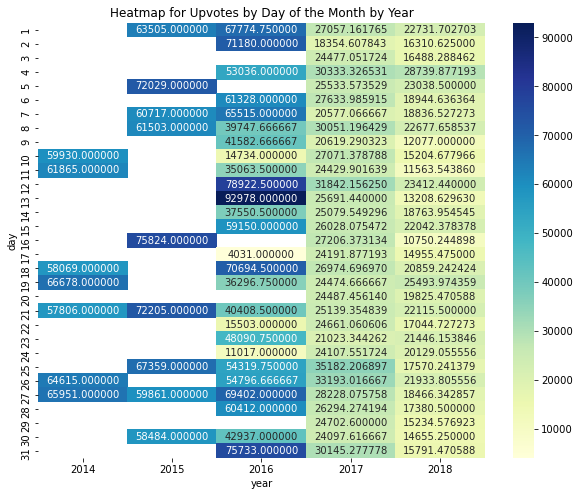

In [38]:
# Heatmap of upvotes by the day of the month broken into years

f1= plt.subplots(1, figsize=(10, 8))
dfs = pd.pivot_table(df_json_2,values='up_votes',index='day',columns='year')
sns.heatmap(dfs,annot=True,fmt='f', cmap="YlGnBu")
plt.title('Heatmap for Upvotes by Day of the Month by Year')

This is a heatmap plot of the amount of upvotes by the day of the month for all months in the years 2014 through 2018.   There is an interesting phenomenon here, that in 2014 to 2015 there only a few days a month that showed postings of memes.  Beginning in 2016 through 2018, the frequency of posting memes to Reddit increased over the days of the month for all months.  The other interesting aspect was that the overall up votes per each meme decreased in those years.  

There could be a few explanations for this.  During the election year of 2016, there was an something known as the "War Meme" that was mostly made up of younger Trump supporters and Bernie Sanders supporters that were sharing political memes across platforms like Twitter, Facebook, 4Chan and Reddit. It is such a running joke that people actually made hats, shirts and stickers that said "Meme War Veteran".  

The possibly reason for the higher amount of upvotes for 2014-2015 is that the was actually less total content or memes on Reddit, so they garnered more votes by loyal users.  As the stream of traffic increased in the years between 2016 and 2018, and the frequency of meme posts also increased, either the quality dropped or there were just so many posts shared that people were missing a certain percentage.  

There is another explanation for the growth of Reddit users during these years as well.  With the election season for 2016 over, there were mass suspensions and bans of users from platforms like Facebook and Twitter, there were many users that split their time between Reddit and these other platforms, so after they were potentially banned, they probably spent more time on platforms like Reddit, 4Chan and other non-mainstream platforms. This wasn't a small number of banned accounts either, these were millions of users that had been on platforms like Twitter for 5 to 10 years and had thousands of followers.  So once they were left homeless by Twitter, by Facebook, these users spent more time on Reddit.

#### 1.3.3 Evaluating the Reddit Users

Need to give a brief background on the `author` column, why they're important, are they social influencers, do they have a following?  How does this effect the upvotes?

**Top 20 Users for Posts**

This is the the count of all posts submitted be each author/user.

In [39]:
df_json_2['author'].value_counts().head(20)

Holofan4life          90
BraveReddit           74
Asado666              73
None                  46
frenzy3               27
RubyPeridot           25
dickfromaccounting    22
sari13371             22
rafat_alamgir         17
Garrick17             15
Shaine_Memes          14
ZeonPeonTree          13
trentluv              13
Vape_Rips             12
deftonesdid911        12
Bongnazi              11
EarlyHemisphere       11
StrangeClownRabbit     9
J_Man2743              9
Blunt_Machette         8
Name: author, dtype: int64

**Top 20 Users for Upvotes**

This is the total number of upvotes received by each user.

In [40]:
df_posts = df_json_2[['author', 'up_votes', 'title']]

In [41]:
user_posts = df_posts.sort_values(('up_votes'), ascending=False)

print(user_posts.head(20))

                   author  up_votes  \
1773             the_Diva    293544   
1774        TheDarkLord66    189622   
1775  Cooter_McDoogletron    166314   
1776            dragonxp1    155401   
1777               --love    148305   
1778              mas1234    144873   
1779           ledgendary    142895   
1780             Nephelus    141597   
1781          kalinkabeek    141523   
1782        GeneReddit123    139622   
1783             shotukan    137601   
1784             snapetom    136312   
1785               Ge_Sto    136226   
1786          Panasonsick    136020   
1787      Nanto_Suichoken    135604   
1788           JulianWels    131997   
1789              vlone17    131407   
1790              Lowghen    131049   
1791      LunchroomRumble    130168   
1792        StardustPrime    129312   

                                                  title  
1773  My cab driver tonight was so excited to share ...  
1774  UPDATE. EA announces plans for next gen contro...  
1775  

In order to use the author/user names for machine learning, the author names need to be transformed from a object or alpha-numeric form into a numeric form.  

We can bin the authors/users based on how many memes that have posted.  

In [42]:
# Setting up a new dataframe

df_json_3 = df_json_2

In [43]:
# This will use the lambda function to find and sum all the posts by each user

df_json_3['post_counts'] = df_json_2['author'].apply(lambda x: (df_json_2['author'] == x).sum())
df_json_3.head()

,title,date_posted,author,id_number,up_votes,media_link,image_thumbnail,height_thumbnail,width_thumbnail,date_created,year,month,day,weekday,weekend,post_counts
0,Num🅱er One,08-13-2017,DrarenThiralas,6tehbc,87082,https://i.redd.it/7wgs4dkiihfz.png,https://b.thumbs.redditmedia.com/FAS_fWvrpmzuP...,121,140,2017-08-13,2017,8,13,6,1,1
1,Got ‘em,04-12-2018,CasualDad8675309,8bse8k,75251,https://i.redd.it/65bzzioisir01.jpg,https://b.thumbs.redditmedia.com/huIqG6r8L3pry...,98,140,2018-04-12,2018,4,12,3,0,1
2,50-0,08-27-2017,NikiTosThePleb,6we7gp,64236,https://i.redd.it/19c4ggoz0ciz.png,https://b.thumbs.redditmedia.com/1LvJdhkQttbVz...,140,140,2017-08-27,2017,8,27,6,1,3
3,Allow,01-14-2018,bananahands0666,7qbcqw,63386,https://i.redd.it/qt5p8ozio0a01.png,https://a.thumbs.redditmedia.com/OoC51rX7qUafr...,110,140,2018-01-14,2018,1,14,6,1,1
4,*mild concern*,01-25-2018,DJ_MilkBags,7szw80,61458,https://i.redd.it/1cudu2jlgac01.jpg,https://b.thumbs.redditmedia.com/f1HuHxndsoLGb...,134,140,2018-01-25,2018,1,25,3,0,1


In [44]:
# Calculate the  quartile thresholds

print(f'Author lower quartile threshold: ', df_json_3['post_counts'].quantile(0.25))
print(f'Author lower quartile threshold: ', df_json_3['post_counts'].quantile(0.50))
print(f'Author lower quartile threshold: ', df_json_3['post_counts'].quantile(0.75))
print(f'Author lower quartile threshold: ', df_json_3['post_counts'].quantile(.95))




Author lower quartile threshold:  1.0
Author lower quartile threshold:  1.0
Author lower quartile threshold:  4.0
Author lower quartile threshold:  74.0


In [45]:
# Checking the statistics of the posts be users

print(df_json_3['post_counts'].describe())
print(df_json_3['post_counts'].median())

count    3226.000000
mean        9.234966
std        21.123424
min         1.000000
25%         1.000000
50%         1.000000
75%         4.000000
max        90.000000
Name: post_counts, dtype: float64
1.0


I was wanting to bin the users into several separate bins based upon home many memes they had posted, but the majority of users have only posted one meme.  It's not until you get to 75% of the meme posts that you actually have users that have posted more than 4 memes in total.  And then after the there are users that have posted as many as 90 memes.

One way I can address this is to setup two bins, one for users that have only posted one meme and the second bin for users that have posted more than one meme.  Ideally I would like to have a range of bins, for example a bin for 1-10, a bin for 11 - 20, and so on.  But this is not the case.  Additionally since there are so many users that have only posted one meme compared to users that have posted at least 2 or more, there is a class imbalance issue. Which can basically be explained as having too many examples of one type of data that the machine learning models only get used to seeing that type of data, in this case users that have only posted one meme.

I will split the data into two bins; single meme posting users vs multiple meme posting users and have to address the class imbalance issue in the machine learning portion of the report.

In [46]:
# Creating the two bins

df_json_3['frequent_poster'] = pd.cut(df_json_3['post_counts'], bins=[-np.inf, 1.0, np.inf], labels=[0, 1])
df_json_3['frequent_poster'].value_counts()

0    1887
1    1339
Name: frequent_poster, dtype: int64

As we we can see, there are 1,887 users that have only posted one meme and there are 1,339 users that have posted multiple memes.  Additionally this could be 2 memes, 4 memes, 20 memes or 50 memes.  But this still may have some relationship to predicting a good meme vs not a good meme when it comes to the machine learning process.

In [47]:
# Checking the dataframe again

df_json_3.head()

,title,date_posted,author,id_number,up_votes,media_link,image_thumbnail,height_thumbnail,width_thumbnail,date_created,year,month,day,weekday,weekend,post_counts,frequent_poster
0,Num🅱er One,08-13-2017,DrarenThiralas,6tehbc,87082,https://i.redd.it/7wgs4dkiihfz.png,https://b.thumbs.redditmedia.com/FAS_fWvrpmzuP...,121,140,2017-08-13,2017,8,13,6,1,1,0
1,Got ‘em,04-12-2018,CasualDad8675309,8bse8k,75251,https://i.redd.it/65bzzioisir01.jpg,https://b.thumbs.redditmedia.com/huIqG6r8L3pry...,98,140,2018-04-12,2018,4,12,3,0,1,0
2,50-0,08-27-2017,NikiTosThePleb,6we7gp,64236,https://i.redd.it/19c4ggoz0ciz.png,https://b.thumbs.redditmedia.com/1LvJdhkQttbVz...,140,140,2017-08-27,2017,8,27,6,1,3,1
3,Allow,01-14-2018,bananahands0666,7qbcqw,63386,https://i.redd.it/qt5p8ozio0a01.png,https://a.thumbs.redditmedia.com/OoC51rX7qUafr...,110,140,2018-01-14,2018,1,14,6,1,1,0
4,*mild concern*,01-25-2018,DJ_MilkBags,7szw80,61458,https://i.redd.it/1cudu2jlgac01.jpg,https://b.thumbs.redditmedia.com/f1HuHxndsoLGb...,134,140,2018-01-25,2018,1,25,3,0,1,0


#### 1.3.4 Finding the Area of the Thumbnail Image

The thumbnail image of each post is basically a smaller version of the meme image itself.  This allows Reddit users to view the smaller image in the Reddit interface without having to click on the meme for a full-size image. It is possible that some users may or may not click on a meme link or upvote based upon the thumbnail image.  

We have two numerical columns for the thumbnail image, the height and the width, and both of these are measured in the number of pixels.  Looking at these, we notice that the width remains constant for all posts, but the thumbnail height varies.  Is it possible that this variation may have an impact on the users upvoting the posts?

We can make a new column of the thumbnail area, which will be the thumbnail width multiplied by the thumbnail height.  This will give us another feature column for the machine learning models to see if there any relationship to how each meme is upvoted.

In [48]:
# Setting up a new dataframe

df_json_4 = df_json_3

In [49]:
# Finding the statistics on image thumbnail width and height

df_json_4[['height_thumbnail', 'width_thumbnail']].describe()

,height_thumbnail,width_thumbnail
count,3226.000000,3226.0
mean,124.788903,140.0
std,20.917240,0.0
min,27.000000,140.0
25%,112.000000,140.0
50%,137.000000,140.0
75%,140.000000,140.0
max,140.000000,140.0


As we can see, the thumbnail width remains 140 for each meme posting, while the thumbnail height varies from 27 pixels to a max of 140 pixels.

In [50]:
# Making a new columns for thumbnail pixel area

df_json_4['thumbnail_pixels'] = df_json_4['height_thumbnail'] * df_json_4['width_thumbnail']
df_json_4['thumbnail_pixels'].describe()

count     3226.000000
mean     17470.446373
std       2928.413596
min       3780.000000
25%      15680.000000
50%      19180.000000
75%      19600.000000
max      19600.000000
Name: thumbnail_pixels, dtype: float64

**Visualize the Thumbnail Area vs Upvotes**

Let us visualize the amount of up votes each meme received based on the thumbnail area for that meme.

Text(0.5, 1.0, 'Up Vote Count vs Thumbnail Area')

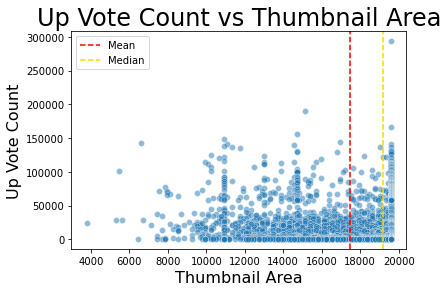

In [51]:
# Scatterplot of upvote count vs thumbnail pixel area

sns.scatterplot(x="thumbnail_pixels", y="up_votes", data=df_json_4, alpha=0.5)
plt.xlabel("Thumbnail Area", size=16)
plt.ylabel("Up Vote Count", size=16)
plt.axvline(df_json_4['thumbnail_pixels'].mean(), c='red', label='Mean', linestyle='--')
plt.axvline(df_json_4['thumbnail_pixels'].median(), c='gold', label='Median', linestyle='--')
plt.legend()
plt.title("Up Vote Count vs Thumbnail Area", size=24)

From this scatter plot you can definitely see that the majority of the thumbnail images had an area between 10000 to 20,000 pixels, there were far less below the 10,000 pixel size. 

Overall there are many posts with 50,000 up votes or less and their area is anywhere from 10,000 to 20,000 pixels.  There are trends at 11,000 pixels, 15,000 pixes and ~20,000 pixels in area where there are a lot of posts with upvotes greater than 50,000 up votes.  Having an area of 20,000 pixels seems to make up the largest group of up votes over 100,000.

Text(0, 0.5, 'Post Count')

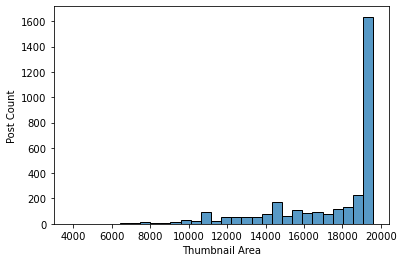

In [52]:
# Histogram plot of thumbnail area by total pixel area

sns.histplot(df_json_4['thumbnail_pixels'])
plt.xlabel("Thumbnail Area", size=10)
plt.ylabel("Post Count", size=10)



Here we are actually looking that the thumbnail area in totel pixels vs the number of posts that actually used that thumbnail area size.  As you can see that the majority of the meme posts have an area of 19,000 pixels and the rest of the meme posts fall between ~6,000 to ~18,500 pixels.  

I am wondering if these dimensions are assigned automatically by the Reddit platform based on the size of the image input?  

Text(0.5, 1.0, 'Thumbnail Area vs Post Year')

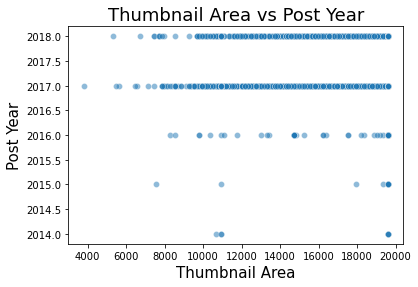

In [53]:
# Scatterplot for the thumbnail areas of posts by year

sns.scatterplot(x="thumbnail_pixels", y="year", data=df_json_4, alpha=0.5)
plt.xlabel("Thumbnail Area", size=15)
plt.ylabel("Post Year", size=15)
plt.title("Thumbnail Area vs Post Year", size=18)

As we have seen prior, that the years 2014 - 2016 did not have the frequency of meme posts that the years 2017 - 2018 had.  We can also see from this that the image thumbnail size did vary in area every year.  I wanted to see if the thumbnail area size had something to do with possibly how Reddit may have sized the thumbnail images depending upon the year, but does not seem to be the case.  This also doesn't seem to be something that the user themselves choose, so it might be something that the Reddit platform assigns based on the image that the user is uploading themselves.

### 1.4 Saving the Dataframes

#### 1.4.1 Reviewing the Dataframes and Saving CSV Files

In [54]:
# Checking the shapes of each dataframe that will be saved

print(f'The shape of df_json is: {df_json.shape}')
print(f'The shape of df_json_2 is: {df_json_2.shape}')
print(f'The shape of df_json_3 is: {df_json_3.shape}')
print(f'The Shape of df_json_4 is: {df_json_4.shape}')

The shape of df_json is: (3226, 10)
The shape of df_json_2 is: (3226, 18)
The shape of df_json_3 is: (3226, 18)
The Shape of df_json_4 is: (3226, 18)


#### 1.4.2 Saving the Current Dataframes and Continuing on with Word Tokenizing in Workbook #2.

In [55]:
# Saving current dataframes to have for workbook 2

df_json.to_csv('csv/df_json.csv', header=True)
df_json_2.to_csv('csv/df_json_2.csv', header=True)
df_json_3.to_csv('csv/df_json_3.csv', header=True)
df_json_4.to_csv('csv/df_json_4.csv', header=True)

**End of Workbook 1:**<br>
Please continue with Workbook 2